In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


Loading pre-trained word vectors...
[==================================================] 100.0% 1662.8/1662.8MB downloaded

Word Relationship: king - man + woman
Most similar words to the result (excluding input words):
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819
prince: 0.5777


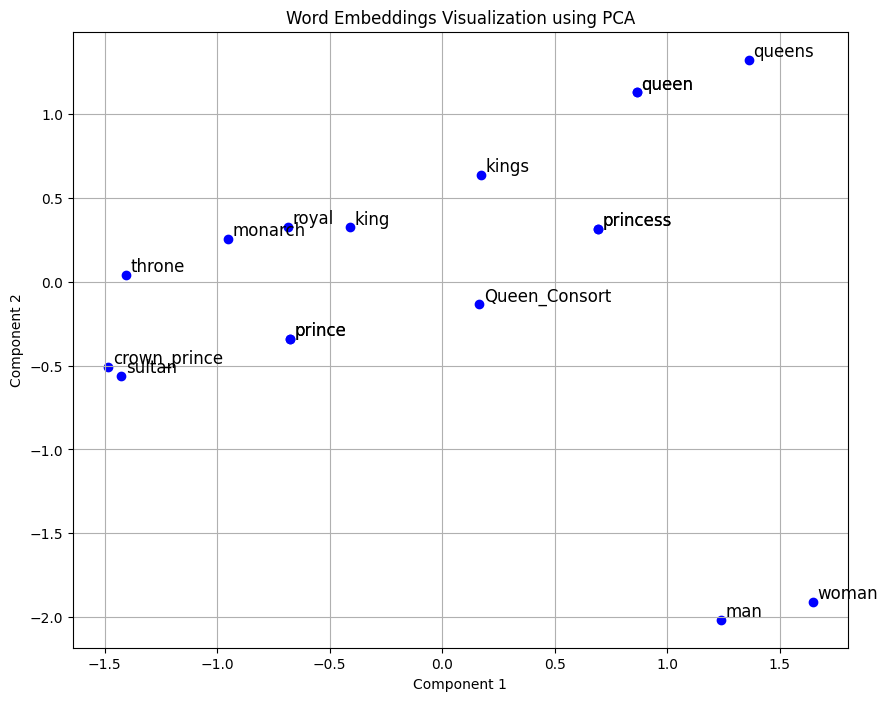

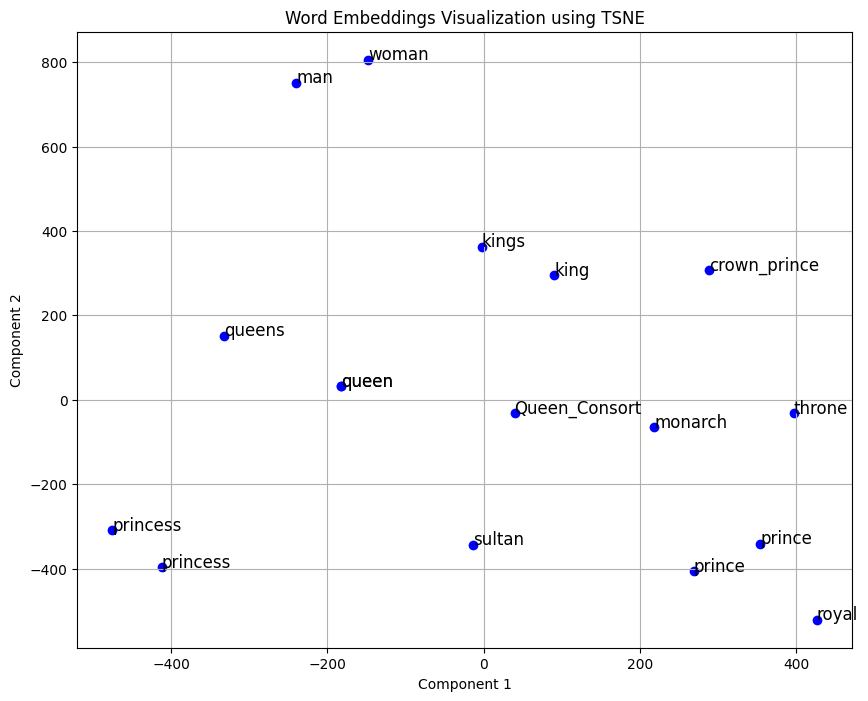

In [ ]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")  # Load Word2Vec model

def explore_word_relationships(word1, word2, word3):
    try:

        result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]

        similar_words = word_vectors.similar_by_vector(result_vector, topn=10)

        input_words = {word1, word2, word3}
        filtered_words = [(word, similarity) for word, similarity in similar_words if word not in input_words]
        print(f"\nWord Relationship: {word1} - {word2} + {word3}")
        print("Most similar words to the result (excluding input words):")
        for word, similarity in filtered_words[:5]:  # Show top 5 results
            print(f"{word}: {similarity:.4f}")
        return filtered_words
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")
        return []

def visualize_word_embeddings(words, vectors, method='pca'):

    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=3)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    reduced_vectors = reducer.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o', color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()


words_to_explore = ["king", "man", "woman", "queen", "prince", "princess", "royal", "throne"]
filtered_words = explore_word_relationships("king", "man", "woman")

words_to_visualize = words_to_explore + [word for word, _ in filtered_words]

vectors_to_visualize = np.array([word_vectors[word] for word in words_to_visualize])

visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='pca')

visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='tsne')

Loading pre-trained word vectors...


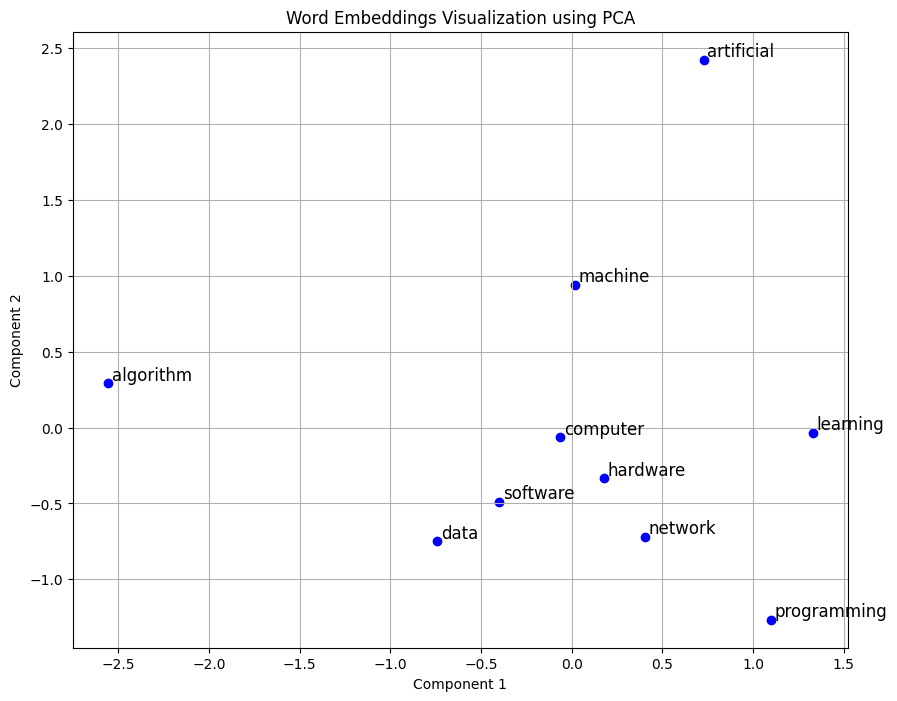

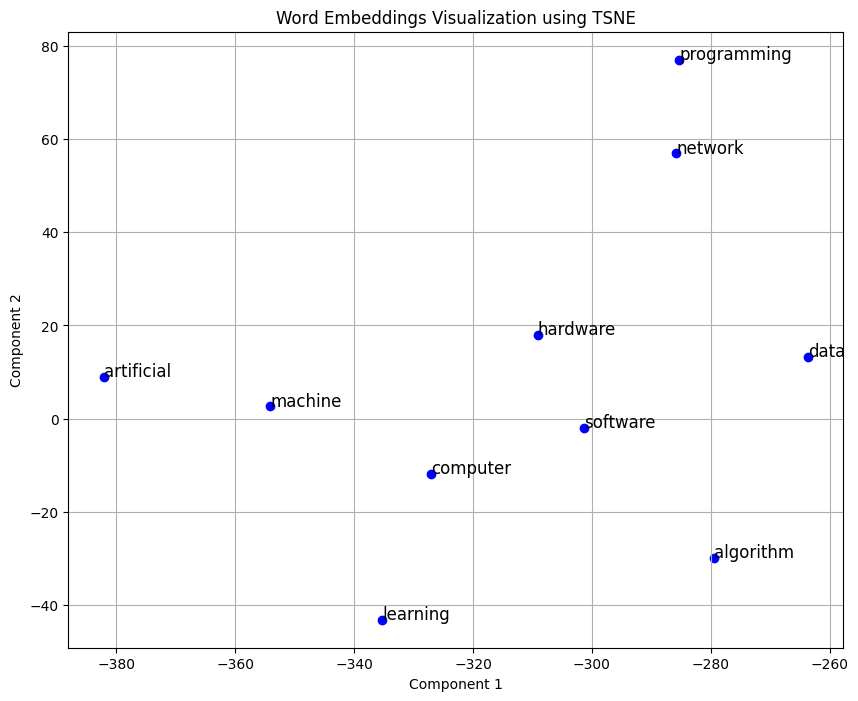


Top 5 semantically similar words to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082

Top 5 semantically similar words to 'learning':
teaching: 0.6602
learn: 0.6365
Learning: 0.6208
reteaching: 0.5810
learner_centered: 0.5739


In [ ]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")
domain_words = ["computer", "software", "hardware", "algorithm", "data", "network", "programming", "machine", "learning", "artificial"]
domain_vectors = np.array([word_vectors[word] for word in domain_words])

def visualize_word_embeddings(words, vectors, method='pca', perplexity=5):

  if method == 'pca':
    reducer = PCA(n_components=2)
  elif method == 'tsne':
    reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
  else:
    raise ValueError("Method must be 'pca' or 'tsne'.")
  reduced_vectors = reducer.fit_transform(vectors)
  plt.figure(figsize=(10, 8))
  for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o', color='blue')
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
  plt.title(f"Word Embeddings Visualization using {method.upper()}")
  plt.xlabel("Component 1")
  plt.ylabel("Component 2")
  plt.grid(True)
  plt.show()

visualize_word_embeddings(domain_words, domain_vectors, method='pca')
visualize_word_embeddings(domain_words, domain_vectors, method='tsne', perplexity=3)

def generate_similar_words(word):
  try:
    similar_words = word_vectors.most_similar(word, topn=5)
    print(f"\nTop 5 semantically similar words to '{word}':")
    for similar_word, similarity in similar_words:
      print(f"{similar_word}: {similarity:.4f}")
  except KeyError as e:
    print(f"Error: {e} not found in the vocabulary.")


generate_similar_words("computer")
generate_similar_words("learning")

In [ ]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = api.load("word2vec-google-news-300")

words = ['computer', 'internet', 'software', 'hardware', 'keyboard', 'mouse', 'server', 'network', 'programming', 'database']
vectors = [model[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

input_word = 'computer'
similar_words = model.most_similar(input_word, topn=5)

print(f"Top 5 words similar to '{input_word}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("PCA Visualization of Technology Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.show()